This module will elaborate more on stochastic gradient model. SGD is an optimization method. It can find the parameters that minimize the loss function. 

SGD allows us to compute the gradient on one random sample rather than all n samples. 
- It is faster but noisier
- Can update if new sample arrive
- Can skip local minimum and find global minimum

We will build an example illustraing SGD on linear regression with MSE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

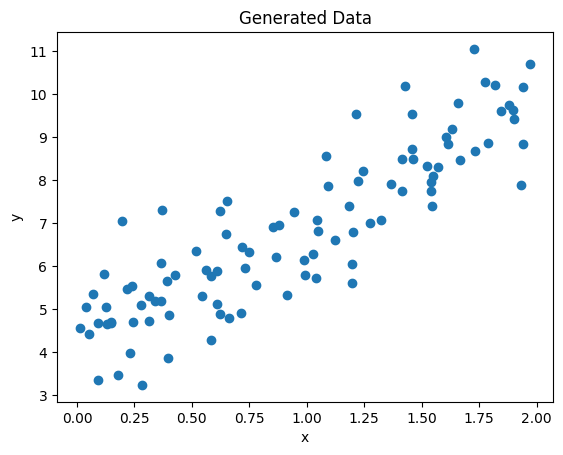

In [2]:
### Create datasets
np.random.seed(42)
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

### Plot datasets
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Data')
plt.show()

Epoch 1: w=1.1862, b=0.9186
MSE=25.2272, Compute cost so far: 410
Epoch 2: w=2.0221, b=1.7215
MSE=8.8852, Compute cost so far: 820
Epoch 3: w=2.5632, b=2.2572
MSE=4.0967, Compute cost so far: 1230
Epoch 4: w=2.9059, b=2.6203
MSE=3.0029, Compute cost so far: 1640
Epoch 5: w=3.1258, b=2.8706
MSE=2.5129, Compute cost so far: 2050
Epoch 6: w=3.2561, b=3.0429
MSE=0.8032, Compute cost so far: 2460
Epoch 7: w=3.3348, b=3.1670
MSE=0.9343, Compute cost so far: 2870
Epoch 8: w=3.3766, b=3.2554
MSE=0.7027, Compute cost so far: 3280
Epoch 9: w=3.3992, b=3.3254
MSE=1.3878, Compute cost so far: 3690
Epoch 10: w=3.4050, b=3.3789
MSE=0.8573, Compute cost so far: 4100
Epoch 11: w=3.4013, b=3.4222
MSE=1.4134, Compute cost so far: 4510
Epoch 12: w=3.3943, b=3.4612
MSE=0.8535, Compute cost so far: 4920
Epoch 13: w=3.3808, b=3.4928
MSE=0.6956, Compute cost so far: 5330
Epoch 14: w=3.3652, b=3.5212
MSE=0.2755, Compute cost so far: 5740
Epoch 15: w=3.3444, b=3.5436
MSE=0.6739, Compute cost so far: 6150
Epoch

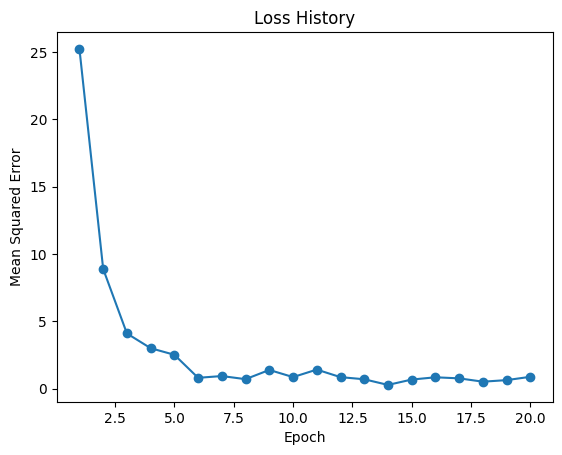

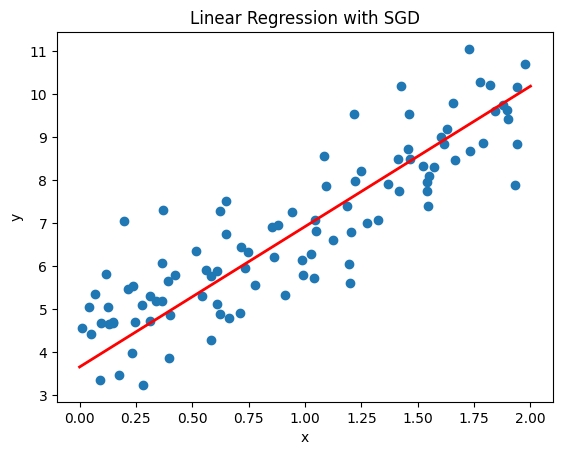

In [18]:
w = np.random.randn(1)
b = np.random.randn(1)
learning_rate = 0.01
n_epochs = 20
batch_size = 10
loss_history = []
compute_cost = 0

import time
start_time = time.perf_counter()
for epoch in range(n_epochs):
    indices = np.arange(len(x)) ### Random shuffle x and y
    np.random.shuffle(indices)
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # Mini-batch gradient descent
    for i in range(0, len(x), batch_size): ### from 0 to n with step size batch_size
        x_batch = x_shuffled[i:i+batch_size] ### Each batch will not overlap
        y_batch = y_shuffled[i:i+batch_size]
        
        ### Compute gradients
        y_pred = w * x_batch + b

        w_grad = (2/batch_size) * np.sum((y_pred - y_batch) * x_batch)
        b_grad = (2/batch_size) * np.sum(y_pred - y_batch)

        ### Update parameters
        w -= learning_rate * w_grad
        b -= learning_rate * b_grad

        compute_cost += 4 * len(x_batch) + 1  ### 4 multiplications and 1 addition per sample

    loss_history.append(np.mean((y_pred - y_batch) ** 2))
    print(f"Epoch {epoch+1}: w={w[0]:.4f}, b={b[0]:.4f}")
    print (f"MSE={loss_history[-1]:.4f}, Compute cost so far: {compute_cost}")

end_time = time.perf_counter()
print(f"Training completed in {end_time - start_time:.4f} seconds")
print(f"Total compute cost: {compute_cost}")
### plot loss history
plt.plot(range(1, n_epochs + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss History')
plt.show()
    
### Plot the results
plt.scatter(x, y)
x_line = np.array([[0], [2]])
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with SGD')
plt.show()



In [15]:
import numpy as np
import matplotlib.pyplot as plt
import time
import math

Epoch 1: w=0.7726, b=-2.4735
MSE=81.9921, Compute cost so far: 401
Epoch 2: w=0.9478, b=-2.3021
MSE=75.5972, Compute cost so far: 802
Epoch 3: w=1.1153, b=-2.1375
MSE=69.7184, Compute cost so far: 1203
Epoch 4: w=1.2757, b=-1.9793
MSE=64.3140, Compute cost so far: 1604
Epoch 5: w=1.4291, b=-1.8274
MSE=59.3457, Compute cost so far: 2005
Epoch 6: w=1.5758, b=-1.6813
MSE=54.7781, Compute cost so far: 2406
Epoch 7: w=1.7162, b=-1.5409
MSE=50.5789, Compute cost so far: 2807
Epoch 8: w=1.8505, b=-1.4060
MSE=46.7183, Compute cost so far: 3208
Epoch 9: w=1.9789, b=-1.2762
MSE=43.1688, Compute cost so far: 3609
Epoch 10: w=2.1017, b=-1.1515
MSE=39.9054, Compute cost so far: 4010
Epoch 11: w=2.2192, b=-1.0316
MSE=36.9048, Compute cost so far: 4411
Epoch 12: w=2.3315, b=-0.9163
MSE=34.1459, Compute cost so far: 4812
Epoch 13: w=2.4388, b=-0.8055
MSE=31.6091, Compute cost so far: 5213
Epoch 14: w=2.5414, b=-0.6988
MSE=29.2764, Compute cost so far: 5614
Epoch 15: w=2.6395, b=-0.5962
MSE=27.1313, Co

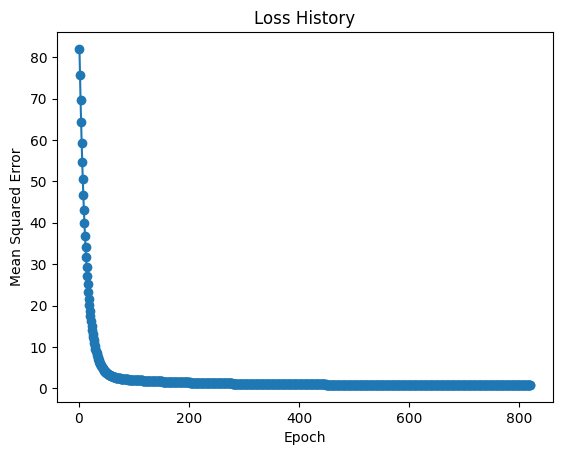

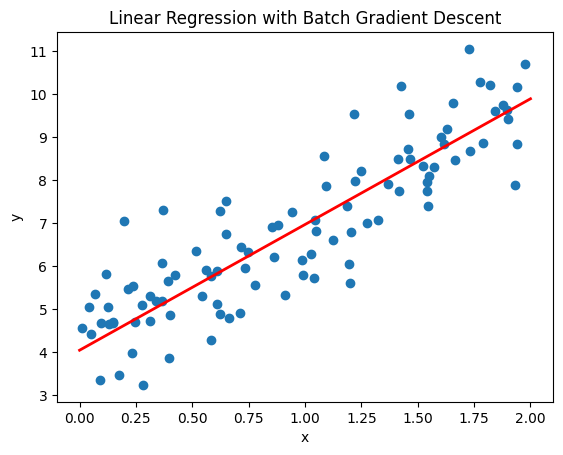

In [21]:
w = np.random.randn(1)
b = np.random.randn(1)
learning_rate = 0.01
n_epochs = 820
batch_size = 10
loss_history = []
compute_cost = 0

start_time = time.perf_counter()
for epoch in range(n_epochs):
    y_pred = w * x + b

    w_grad = (2/len(x)) * np.sum((y_pred - y) * x)
    b_grad = (2/len(x)) * np.sum(y_pred - y)
    ### Update parameters
    w -= learning_rate * w_grad
    b -= learning_rate * b_grad
    compute_cost += 4 * len(x) + 1  ### 4 multiplications and 1 addition per sample
    loss_history.append(np.mean((y_pred - y) ** 2))
    print(f"Epoch {epoch+1}: w={w[0]:.4f}, b={b[0]:.4f}")
    print (f"MSE={loss_history[-1]:.4f}, Compute cost so far: {compute_cost}")

    
end_time = time.perf_counter()
print(f"Training completed in {end_time - start_time:.4f} seconds")
# --- IGNORE ---
print(f"Total compute cost: {compute_cost}")

### plot loss history
plt.plot(range(1, len(loss_history) + 1), loss_history, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Loss History')
plt.show()

### plot the results
plt.scatter(x, y)
x_line = np.array([[0], [2]])
y_line = w * x_line + b
plt.plot(x_line, y_line, color='red', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with Batch Gradient Descent')
plt.show()